##***Introducción***##

En este proyecto  se pretende utilizar el algoritmo de descenso por gradiente para manifiestar es para practicar regresión lineal.


#Importando librerias necesarias#

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Cargando los Datos  y Renombrando Columnas#

Cargando los datos a un array con Numpy

In [3]:
data_array = np.load("/content/proyecto_training_data.npy")
#Recordar cambiar esto.

Cargando los datos a un DataFrame con Pandas para mayor facilidad en la manipulación de datos.

In [28]:
data= pd.DataFrame(data_array)
data.head()


,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


Renombrando las columnas para mejor entendimiento de los tados:

In [29]:
data.columns = ["Sale Price","Overall-Quality", "1stFlrSF", "TotRmsAbvGrd","YearBuilt","LotFrontage"]
data.head()


,Sale Price,Overall-Quality,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


#Dividiendo los datos de entrenamiento y de testing.

El set es dividido en 2 partes. El data_train representa los datos a entrenar y el data_test representa los datos para validar nuestro algoritmo.

In [33]:
n=len(data)   #Número de registros en el dataSet
data['Train'] = np.random.uniform(0,1,n) <=0.8 #Create a column to assign a number randomly to 80% of data.
data_train, data_test=data[data['Train'] ==True], data[data['Train'] ==False]   #dividiendo el dataSet.
print(f"Registros de entrenamiento: {len(data_train)} \nRegistros para Testeo: {len(data_test)} \n")
del data['Train']
del data_train['Train']
del data_test['Train']



Registros de entrenamiento: 1172 
Registros para Testeo: 288 



#Analisis Exploratorio de Datos

Los números para describir los datos son presentados en una tabla usando pandas. 

In [34]:
data_train.head()

,Sale Price,Overall-Quality,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0


In [35]:
AED = {"Media":data_train.mean(), "Valor Máximo": data_train.max(), "Valor Minimo": data_train.min(), "Rango": data_train.max()-data_train.min(), "Desviación Standar": data_train.std()}
pd.DataFrame(AED)

,Media,Valor Máximo,Valor Minimo,Rango,Desviación Standar
Sale Price,179918.000853,755000.0,34900.0,720100.0,81103.369264
Overall-Quality,6.089590,10.0,1.0,9.0,1.400132
1stFlrSF,1164.525597,4692.0,334.0,4358.0,389.695465
TotRmsAbvGrd,6.509386,12.0,2.0,10.0,1.624139
YearBuilt,1970.789249,2010.0,1872.0,138.0,30.412520
LotFrontage,69.954918,313.0,21.0,292.0,24.878495


#Histogramas de Cada Variable#

Acá se presentan todos los histogramas de cada variable.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


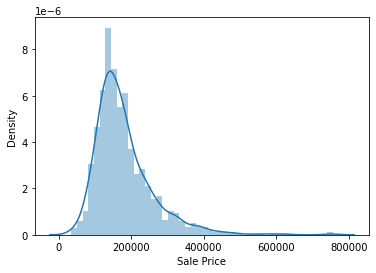

In [36]:
sns.distplot(data_train['Sale Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


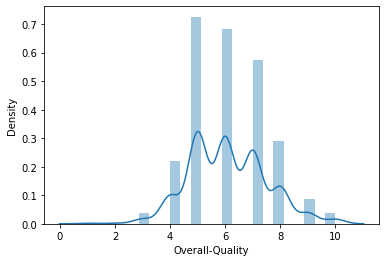

In [37]:
sns.distplot(data_train['Overall-Quality'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


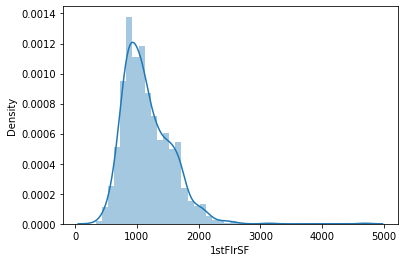

In [38]:
sns.distplot(data_train['1stFlrSF'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


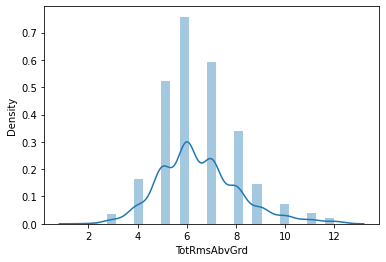

In [39]:
sns.distplot(data_train['TotRmsAbvGrd'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


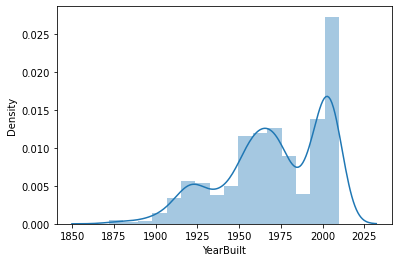

In [40]:
sns.distplot(data_train['YearBuilt'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


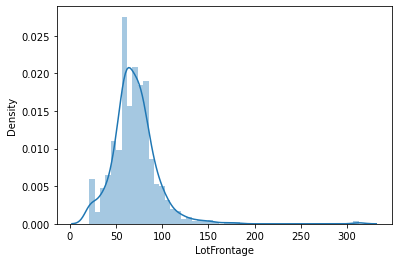

In [41]:
sns.distplot(data_train['LotFrontage'])

#Coeficientes de Correlación y ScatterPlots

**-Coeficientes de Correlación entre variables**

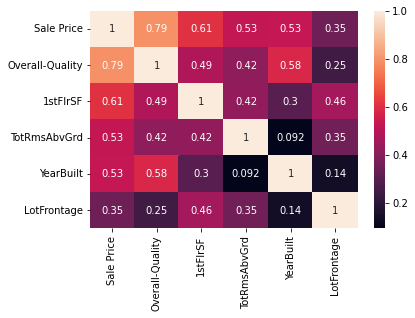

In [42]:
sns.heatmap(data_train.corr(),annot=True)
plt.show()

**-Gráficas con MatplotLib**

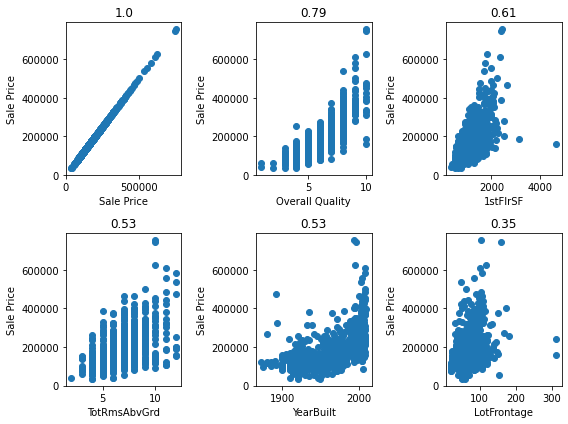

In [43]:
fig, axes =plt.subplots(2,3)
y=data_train['Sale Price']

#Tamaño
fig.set_figheight(6)
fig.set_figwidth(8)

#Graficas
axes[0,0].scatter(y,y)
axes[0,1].scatter(data_train['Overall-Quality'],y)
axes[0,2].scatter(data_train["1stFlrSF"],y)
axes[1,0].scatter(data_train['TotRmsAbvGrd'],y)
axes[1,1].scatter(data_train['YearBuilt'],y)
axes[1,2].scatter(data_train['LotFrontage'],y)

#Correlaciones
axes[0,0].set_title(round(y.corr(y),2))
axes[0,1].set_title(round(y.corr(data_train['Overall-Quality']),2))
axes[0,2].set_title(round(y.corr(data_train["1stFlrSF"]),2))
axes[1,0].set_title(round(y.corr(data_train['TotRmsAbvGrd']),2))
axes[1,1].set_title(round(y.corr(data_train['YearBuilt']),2))
axes[1,2].set_title(round(y.corr(data_train['LotFrontage']),2))

#Etiquetas en Y
for i in range(2):
  for j in range(3):
    axes[i,j].set_ylabel("Sale Price")


#Etiquetas en X
axes[0,0].set_xlabel("Sale Price")
axes[0,1].set_xlabel("Overall Quality")
axes[0,2].set_xlabel("1stFlrSF")
axes[1,0].set_xlabel('TotRmsAbvGrd')
axes[1,1].set_xlabel('YearBuilt')
axes[1,2].set_xlabel('LotFrontage')

fig.tight_layout()
plt.show()

En la gráfica anterior se puede observar que existe mayor correlación para el precio de ventas por parte de las variables **Overall Quality y  First Floor square feet (1stFlrSF:)**  Por lo que se tomarán estas dos variables para nuestros modelos de entrenamiento.

##Entrenando el Modelo Lineal - Gradient Descent

Primero, obtendremos las variables del DataFrame que usaremos para la variable **Overral-Quality**

A *x* le agregaré una columna con 1's.

In [105]:
y=np.array(data_train['Sale Price'])
x=data_train['Overall-Quality']
x= np.array([data_train['Overall-Quality'],np.ones(len(x))])


[208500. 181500. 223500. ... 266500. 142125. 147500.]


##Función del Descenso de Gradiente

In [135]:
def descenso_gradiente(X,y,beta,alpha,num_iters):
  n =len(y)   #Número de elementos en el array
  costo_acum =[]

  for i in range(num_iters):
    y_pred=np.dot(X,beta)
    gradient = np.dot(X.T, y_pred -y )/n
    #print(gradient)
    beta = beta - alpha*gradient
    
    #Calculando el costo
    y_pred= np.dot(X,beta)
    costo=np.sum((y_pred-y)**2)/(2*n)
    
    costo_acum.append(costo)
  
  return beta, costo_acum




Acá entrenaremos el modelo con el algoritmo anterior

In [142]:
alpha = 0.15
beta = 25
epoch=1
b0,b1=descenso_gradiente(x,y,beta,alpha,epoch)
print(b0[0].sum(),b0[1].sum())

245037.999274744 218073.13511092152
